Install and Import Dependencies

In [33]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

Read in Image, Grayscale and Blur

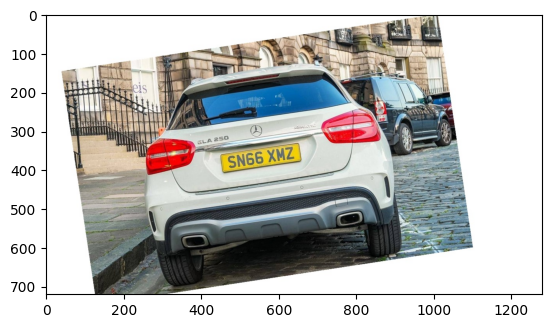

In [51]:
img = cv2.imread('car.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

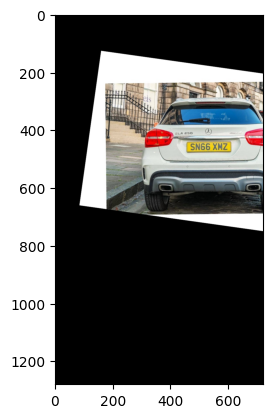

In [66]:
h, w = img.shape[0], img.shape[1]
rotation_mat = cv2.getRotationMatrix2D((h/2,w/2),-8,0.75)
rotated_img = cv2.warpAffine(img,rotation_mat,(h,w))
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))

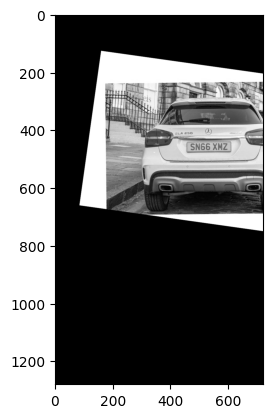

In [67]:
gray = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

Apply filter and find edges for localization

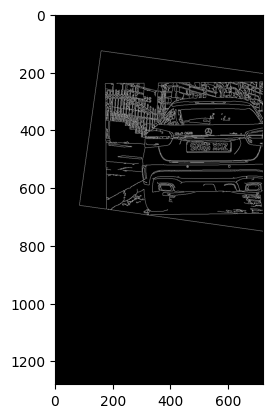

In [68]:
#Noise reduction
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
#Edge detection
edged = cv2.Canny(bfilter, 30, 200) 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

Find Contours and Apply Mask

In [69]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [70]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [71]:
location

array([[[358, 591]],

       [[366, 610]],

       [[409, 610]],

       [[403, 592]]], dtype=int32)

In [74]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(rotated_img, rotated_img, mask=mask)

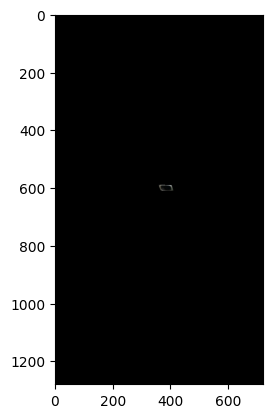

In [75]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [76]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

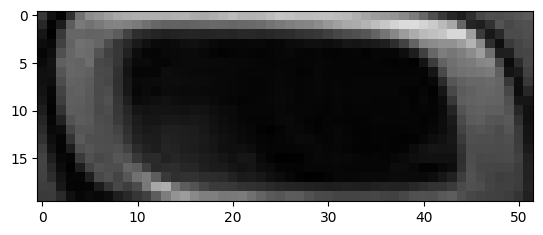

In [77]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Use Easy OCR To Read Text

In [11]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[14, 0], [216, 0], [216, 48], [14, 48]], 'w659 UEN', 0.31826398544906637)]